In [263]:
import glob

species_l = ["c_elegans"]
            # "h_sapiens",
            # "m_musculus",
            # "s_cerevisiae"]

In [302]:
s1_correct,s1_first_incorrect = 0,0
s2_correct,s2_first_incorrect,s2_second_incorrect = 0,0,0

s1_correct_rank_scores,s1_first_incorrect_rank_scores = [],[]
s1_correct_pepnovo_scores,s1_first_incorrect_pepnovo_scores = [],[]

s2_correct_rank_scores,s2_first_incorrect_rank_scores,s2_second_incorrect_rank_scores = [],[],[]
s2_correct_pepnovo_scores,s2_first_incorrect_pepnovo_scores,s2_second_incorrect_pepnovo_scores = [],[],[]

PEPNOVO = False

# def match_amino_acid(aa1,aa2):
#     if aa1 == aa2:
#         return True
#     # if (aa1 == 'I' and aa2 == 'L') or (aa1 == 'L' and aa2 == 'I'):
#     #     return True
#     # if (aa1 == 'Q' and aa2 == 'K') or (aa1 == 'K' and aa2 == 'Q'):
#     #     return True
#     return False

# def match_peptide(pep1,pep2):
#     if len(pep1) != len(pep2):
#         return False
#     for i in range(len(pep1)):
#         if not match_amino_acid(pep1[i],pep2[i]):
#             return False
#     return True
filename = 'synthetic_*25.txt'
test = []
count = 0
for species in species_l:
    for score_file in glob.glob(f'../synthetic/scores/{filename}'):
    # for score_file in glob.glob(f'./scores_trypsin_correct_pm_7-16/pepnovo_scores_{species}_*.txt'):
        start = False
        with open(score_file,'r') as f:
            first_correct = False
            # first_correct_loose = False
            for line in f:
                # print(line)
                if not start and line.startswith("PTMs considered"):
                    start = True
                    continue
                if len(line.strip()) == 0:
                    continue
                if line[0] == '>':
                    consensus_seq = line.split()[3].split('/')[0]
                '''
                uncomment these if there is a missing '>> ...'
                '''
                # if line[0] == '>' or 'ABCDEFG' in line.split()[2]:
                #     consensus_seq = line.split()[2].split('/')[0]
                if line[0] == '0':
                # if line[0] == '0' and 'ABCDEFG' not in line.split()[2]:
                    count += 1
                    vals = line.strip().split()
                    predicted_seq = vals[-1]
                    # print(consensus_seq)
                    if PEPNOVO:
                        rank_score = max(0.1,float(vals[1]) + 20)
                    else:
                        rank_score = max(0.1,float(vals[1]))
                    # print(rank_score)
                    pepnovo_score = float(vals[2])
                    if predicted_seq == consensus_seq:
                        test.append(rank_score)
                        s1_correct += 1
                        s1_correct_rank_scores.append(rank_score)
                        s1_correct_pepnovo_scores.append(pepnovo_score)
                        first_correct = True
                        first_correct_loose = False
                    # elif match_peptide(consensus_seq,predicted_seq): #predicted_seq == consensus_seq:
                    #     s1_correct += 1
                    #     s1_correct_rank_scores.append(rank_score)
                    #     s1_correct_pepnovo_scores.append(pepnovo_score)
                    #     first_correct_loose = True
                    #     first_correct = False
                    else:
                        s1_first_incorrect += 1
                        s1_first_incorrect_rank_scores.append(rank_score)
                        s1_first_incorrect_pepnovo_scores.append(pepnovo_score)
                        first_correct = False
                        # first_correct_loose = False
                if line[0] == '1':
                    '''
                    same here
                    '''
                # if line[0] == '1' and 'ABCDEFG' not in line.split()[2]:
                    count += 1
                    vals = line.strip().split()
                    predicted_seq = vals[-1]
                    if PEPNOVO:
                        rank_score = max(0.1,float(vals[1]) + 20)
                    else:
                        rank_score = max(0.1,float(vals[1]))
                    pepnovo_score = float(vals[2])
                    if predicted_seq == consensus_seq:
                        assert not first_correct
                        # if first_correct_loose:
                        #     s1_correct -= 1
                        #     s1_correct_rank_scores.pop(-1)
                        #     s1_correct_pepnovo_scores.pop(-1)
                            
                        s2_correct += 1
                        s2_correct_rank_scores.append(rank_score)
                        s2_correct_pepnovo_scores.append(pepnovo_score)
                    # elif match_peptide(consensus_seq,predicted_seq) and not first_correct: #predicted_seq == consensus_seq:
                    #     s2_correct += 1
                    #     s2_correct_rank_scores.append(rank_score)
                    #     s2_correct_pepnovo_scores.append(pepnovo_score)
                    else:
                        if first_correct:# or first_correct_loose:
                            s2_first_incorrect += 1
                            s2_first_incorrect_rank_scores.append(rank_score)
                            s2_first_incorrect_pepnovo_scores.append(pepnovo_score)
                        else:
                            s2_second_incorrect += 1
                            s2_second_incorrect_rank_scores.append(rank_score)
                            s2_second_incorrect_pepnovo_scores.append(pepnovo_score)

# correct number different because 
print(count)
print(s1_correct,s1_first_incorrect)
print(s2_correct,s2_first_incorrect,s2_second_incorrect)

20000
5059 4941
2212 5059 2729


In [303]:
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
import numpy as np

In [304]:
# plt.hist(test,bins=50)
save_dir = '../synthetic/fdr_result/'

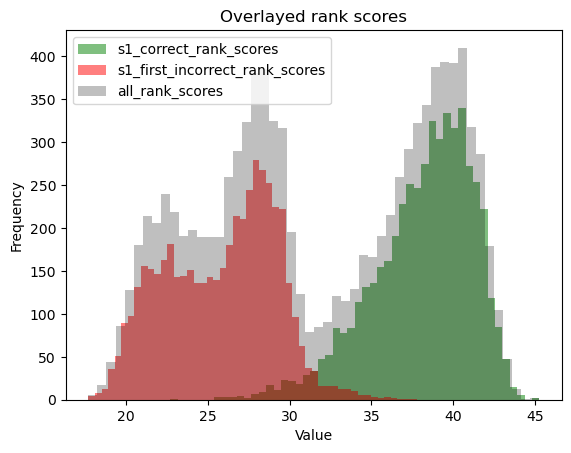

In [305]:
# Plot histogram for the first dataset
plt.hist(s1_correct_rank_scores, bins=50, color='green', alpha=0.5, label='s1_correct_rank_scores')

s1_first_incorrect_rank_scores = [score for score in s1_first_incorrect_rank_scores if score != -999]
# Plot histogram for the second dataset
plt.hist(s1_first_incorrect_rank_scores, bins=50, color='red', alpha=0.5, label='s1_first_incorrect_rank_scores')

all_rank_scores = list(s1_correct_rank_scores) + list(s1_first_incorrect_rank_scores)
plt.hist(all_rank_scores, bins=50, color='black', alpha=0.25, label='all_rank_scores')

# Add titles and labels
plt.title('Overlayed rank scores')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()  # Show legend to distinguish datasets

# Display the plot
plt.show()

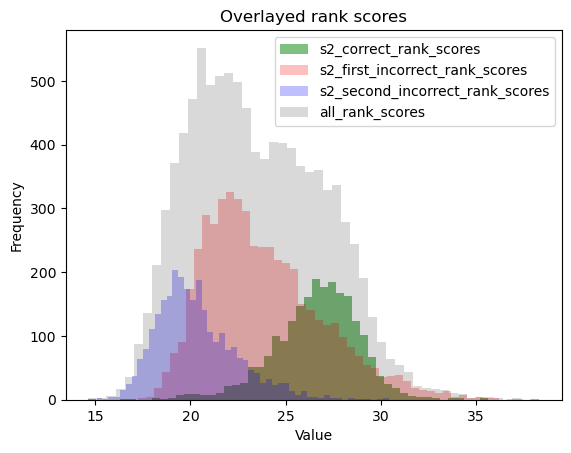

In [306]:
# Plot histogram for the first dataset
plt.hist(s2_correct_rank_scores, bins=50, color='green', alpha=0.5, label='s2_correct_rank_scores')

s2_first_incorrect_rank_scores = [score for score in s2_first_incorrect_rank_scores if score != -999]
s2_second_incorrect_rank_scores = [score for score in s2_second_incorrect_rank_scores if score != -999]
# Plot histogram for the second dataset
plt.hist(s2_first_incorrect_rank_scores, bins=50, color='red', alpha=0.25, label='s2_first_incorrect_rank_scores')
plt.hist(s2_second_incorrect_rank_scores, bins=50, color='blue', alpha=0.25, label='s2_second_incorrect_rank_scores')

all_rank_scores = list(s2_correct_rank_scores) + list(s2_first_incorrect_rank_scores) + list(s2_second_incorrect_rank_scores)
plt.hist(all_rank_scores, bins=50, color='black', alpha=0.15, label='all_rank_scores')

# Add titles and labels
plt.title('Overlayed rank scores')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()  # Show legend to distinguish datasets

# Display the plot
plt.show()

In [189]:

PEPNOVO = False

# def match_amino_acid(aa1,aa2):
#     if aa1 == aa2:
#         return True
#     # if (aa1 == 'I' and aa2 == 'L') or (aa1 == 'L' and aa2 == 'I'):
#     #     return True
#     # if (aa1 == 'Q' and aa2 == 'K') or (aa1 == 'K' and aa2 == 'Q'):
#     #     return True
#     return False

# def match_peptide(pep1,pep2):
#     if len(pep1) != len(pep2):
#         return False
#     for i in range(len(pep1)):
#         if not match_amino_acid(pep1[i],pep2[i]):
#             return False
#     return True
for synth_index in range(1,31):
    s1_correct,s1_first_incorrect = 0,0
    s2_correct,s2_first_incorrect,s2_second_incorrect = 0,0,0
    
    s1_correct_rank_scores,s1_first_incorrect_rank_scores = [],[]
    s1_correct_pepnovo_scores,s1_first_incorrect_pepnovo_scores = [],[]
    
    s2_correct_rank_scores,s2_first_incorrect_rank_scores,s2_second_incorrect_rank_scores = [],[],[]
    s2_correct_pepnovo_scores,s2_first_incorrect_pepnovo_scores,s2_second_incorrect_pepnovo_scores = [],[],[]

    filename = f'synthetic_{synth_index}.txt'
    test = []
    count = 0
    for species in species_l:
        for score_file in glob.glob(f'../synthetic/scores/{filename}'):
        # for score_file in glob.glob(f'./scores_trypsin_correct_pm_7-16/pepnovo_scores_{species}_*.txt'):
            start = False
            with open(score_file,'r') as f:
                first_correct = False
                # first_correct_loose = False
                for line in f:
                    # print(line)
                    if not start and line.startswith("PTMs considered"):
                        start = True
                        continue
                    if len(line.strip()) == 0:
                        continue
                    if line[0] == '>':
                        consensus_seq = line.split()[3].split('/')[0]
                    '''
                    uncomment these if there is a missing '>> ...'
                    '''
                    # if line[0] == '>' or 'ABCDEFG' in line.split()[2]:
                    #     consensus_seq = line.split()[2].split('/')[0]
                    if line[0] == '0':
                    # if line[0] == '0' and 'ABCDEFG' not in line.split()[2]:
                        count += 1
                        vals = line.strip().split()
                        predicted_seq = vals[-1]
                        # print(consensus_seq)
                        if PEPNOVO:
                            rank_score = max(0.1,float(vals[1]) + 20)
                        else:
                            rank_score = max(0.1,float(vals[1]))
                        # print(rank_score)
                        pepnovo_score = float(vals[2])
                        if predicted_seq == consensus_seq:
                            test.append(rank_score)
                            s1_correct += 1
                            s1_correct_rank_scores.append(rank_score)
                            s1_correct_pepnovo_scores.append(pepnovo_score)
                            first_correct = True
                            first_correct_loose = False
                        # elif match_peptide(consensus_seq,predicted_seq): #predicted_seq == consensus_seq:
                        #     s1_correct += 1
                        #     s1_correct_rank_scores.append(rank_score)
                        #     s1_correct_pepnovo_scores.append(pepnovo_score)
                        #     first_correct_loose = True
                        #     first_correct = False
                        else:
                            s1_first_incorrect += 1
                            s1_first_incorrect_rank_scores.append(rank_score)
                            s1_first_incorrect_pepnovo_scores.append(pepnovo_score)
                            first_correct = False
                            # first_correct_loose = False
                    if line[0] == '1':
                        '''
                        same here
                        '''
                    # if line[0] == '1' and 'ABCDEFG' not in line.split()[2]:
                        count += 1
                        vals = line.strip().split()
                        predicted_seq = vals[-1]
                        if PEPNOVO:
                            rank_score = max(0.1,float(vals[1]) + 20)
                        else:
                            rank_score = max(0.1,float(vals[1]))
                        pepnovo_score = float(vals[2])
                        if predicted_seq == consensus_seq:
                            assert not first_correct
                            # if first_correct_loose:
                            #     s1_correct -= 1
                            #     s1_correct_rank_scores.pop(-1)
                            #     s1_correct_pepnovo_scores.pop(-1)
                                
                            s2_correct += 1
                            s2_correct_rank_scores.append(rank_score)
                            s2_correct_pepnovo_scores.append(pepnovo_score)
                        # elif match_peptide(consensus_seq,predicted_seq) and not first_correct: #predicted_seq == consensus_seq:
                        #     s2_correct += 1
                        #     s2_correct_rank_scores.append(rank_score)
                        #     s2_correct_pepnovo_scores.append(pepnovo_score)
                        else:
                            if first_correct:# or first_correct_loose:
                                s2_first_incorrect += 1
                                s2_first_incorrect_rank_scores.append(rank_score)
                                s2_first_incorrect_pepnovo_scores.append(pepnovo_score)
                            else:
                                s2_second_incorrect += 1
                                s2_second_incorrect_rank_scores.append(rank_score)
                                s2_second_incorrect_pepnovo_scores.append(pepnovo_score)
    # Plot histogram for the first dataset
    plt.hist(s1_correct_rank_scores, bins=50, color='green', alpha=0.5, label='s1_correct_rank_scores')
    
    s1_first_incorrect_rank_scores = [score for score in s1_first_incorrect_rank_scores if score != -999]
    # Plot histogram for the second dataset
    plt.hist(s1_first_incorrect_rank_scores, bins=50, color='red', alpha=0.5, label='s1_first_incorrect_rank_scores')
    
    all_rank_scores = list(s1_correct_rank_scores) + list(s1_first_incorrect_rank_scores)
    plt.hist(all_rank_scores, bins=50, color='black', alpha=0.25, label='all_rank_scores')
    
    # Add titles and labels
    plt.title(f'{synth_index}: Overlayed rank scores')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()  # Show legend to distinguish datasets
    
    # Display the plot
    # plt.show()
    plt.savefig(f'{save_dir}/synthetic_{synth_index}/s1.png')
    plt.clf()

    # Plot histogram for the first dataset
    plt.hist(s2_correct_rank_scores, bins=50, color='green', alpha=0.5, label='s2_correct_rank_scores')
    
    s2_first_incorrect_rank_scores = [score for score in s2_first_incorrect_rank_scores if score != -999]
    s2_second_incorrect_rank_scores = [score for score in s2_second_incorrect_rank_scores if score != -999]
    # Plot histogram for the second dataset
    plt.hist(s2_first_incorrect_rank_scores, bins=50, color='red', alpha=0.25, label='s2_first_incorrect_rank_scores')
    plt.hist(s2_second_incorrect_rank_scores, bins=50, color='blue', alpha=0.25, label='s2_second_incorrect_rank_scores')
    
    all_rank_scores = list(s2_correct_rank_scores) + list(s2_first_incorrect_rank_scores) + list(s2_second_incorrect_rank_scores)
    plt.hist(all_rank_scores, bins=50, color='black', alpha=0.15, label='all_rank_scores')
    
    # Add titles and labels
    plt.title(f'{synth_index}: Overlayed rank scores')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()  # Show legend to distinguish datasets
    
    # Display the plot
    # plt.show()
    plt.savefig(f'{save_dir}/synthetic_{synth_index}/s2.png')
    plt.clf()
    

<Figure size 640x480 with 0 Axes>

## after here is for pepnovo, useless for synthetic scores

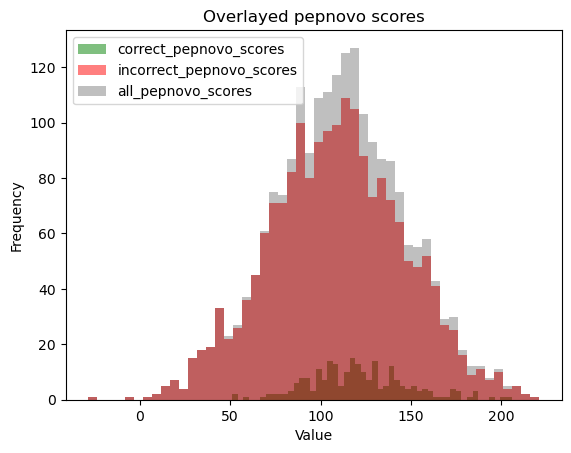

In [78]:
# Plot histogram for the first dataset
plt.hist(correct_pepnovo_scores, bins=50, color='green', alpha=0.5, label='correct_pepnovo_scores')

# Plot histogram for the second dataset
plt.hist(incorrect_pepnovo_scores, bins=50, color='red', alpha=0.5, label='incorrect_pepnovo_scores')

all_pepnovo_scores = correct_pepnovo_scores + incorrect_pepnovo_scores
plt.hist(all_scores, bins=50, color='black', alpha=0.25, label='all_pepnovo_scores')

# Add titles and labels
plt.title('Overlayed pepnovo scores')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()  # Show legend to distinguish datasets

# Display the plot
plt.show()

In [17]:
max(correct_pepnovo_scores), max(incorrect_pepnovo_scores)

('99.925', '99.998')

In [65]:
min(correct_rank_scores), min(incorrect_rank_scores)

(-2.453, -999.0)

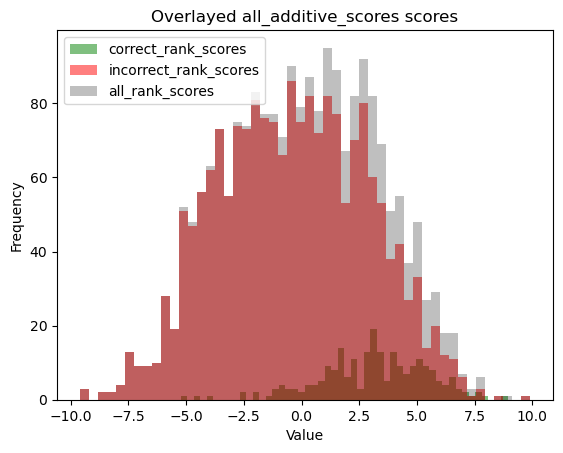

In [82]:
import numpy as np

rank_mu = np.mean(all_rank_scores)
rank_sd = np.std(all_rank_scores)
correct_rank_scores_norm = [3 * (x - rank_mu) / rank_sd for x in correct_rank_scores]
incorrect_rank_scores_norm = [3 * (x - rank_mu) / rank_sd for x in incorrect_rank_scores]

pepnovo_mu = np.mean(all_pepnovo_scores)
pepnovo_sd = np.std(all_pepnovo_scores)
correct_pepnovo_scores_norm = [(x - pepnovo_mu) / pepnovo_sd for x in correct_pepnovo_scores]
incorrect_pepnovo_scores_norm = [(x - pepnovo_mu) / pepnovo_sd for x in incorrect_pepnovo_scores]

correct_additive_scores = np.add(correct_rank_scores_norm, correct_pepnovo_scores_norm)
incorrect_additive_scores = np.add(incorrect_rank_scores_norm, incorrect_pepnovo_scores_norm)

# Plot histogram for the first dataset
plt.hist(correct_additive_scores, bins=50, color='green', alpha=0.5, label='correct_rank_scores')

# Plot histogram for the second dataset
plt.hist(incorrect_additive_scores, bins=50, color='red', alpha=0.5, label='incorrect_rank_scores')

all_additive_scores = list(correct_additive_scores) + list(incorrect_additive_scores)
plt.hist(all_additive_scores, bins=50, color='black', alpha=0.25, label='all_rank_scores')

# Add titles and labels
plt.title('Overlayed all_additive_scores scores')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()  # Show legend to distinguish datasets

# Display the plot
plt.show()